**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

----

# Trabajo Práctico Entregable - Parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_melb = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

## Exploracion de los datos



Utilizamos algunas funciones de ```pandas``` que resultaran utiles para conocer el _Dataset_



In [3]:
df_melb.shape

(13580, 21)

In [4]:
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df_melb[['Suburb', 'Postcode', 'CouncilArea', 'Regionname']].sample(5)

,Suburb,Postcode,CouncilArea,Regionname
8465,Thornbury,3071.00,Darebin,Northern Metropolitan
1503,Bulleen,3105.00,Manningham,Eastern Metropolitan
322,Ascot Vale,3032.00,Moonee Valley,Western Metropolitan
11789,Sandringham,3191.00,Bayside,Southern Metropolitan
2190,Doncaster,3108.00,Manningham,Eastern Metropolitan


In [6]:
df_melb['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [7]:
df_melb['CouncilArea'].value_counts()

CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64

In [8]:
df_melb['Suburb'].value_counts()

Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: count, Length: 314, dtype: int64

In [9]:
df_melb['Regionname'].value_counts()

Regionname
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: count, dtype: int64

## Ejercicio 1 - SQL:

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el _Dataset_ generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



### 1.1 Base de datos

Primero se importa dos elementos de la bilioteca [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy) para crear un motor de base de datos

In [10]:
from sqlalchemy import create_engine, text

Luego se crea un motor de base de datos que representa la conexión a una base de datos y se utiliza para enviar comandos SQL y recibir resultados


In [11]:
engine = create_engine('sqlite:///db_practico.sqlite3', echo=True)

Se escriben los datos del DataFrame ```df_melb``` en una tabla de datos llamada ``` db_melb ``` utilizando SQLAlchemy como motor de base de datos

In [12]:
df_melb.to_sql('db_melb', con=engine, if_exists="replace")

2024-05-10 21:02:02,730 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:02,772 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("db_melb")


2024-05-10 21:02:02,780 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-10 21:02:02,786 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("db_melb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("db_melb")


2024-05-10 21:02:02,792 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-10 21:02:02,805 INFO sqlalchemy.engine.Engine 
CREATE TABLE db_melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE db_melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2024-05-10 21:02:02,811 INFO sqlalchemy.engine.Engine [no key 0.00551s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00551s] ()


2024-05-10 21:02:02,885 INFO sqlalchemy.engine.Engine CREATE INDEX ix_db_melb_index ON db_melb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_db_melb_index ON db_melb ("index")


2024-05-10 21:02:02,893 INFO sqlalchemy.engine.Engine [no key 0.00762s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00762s] ()


2024-05-10 21:02:03,873 INFO sqlalchemy.engine.Engine INSERT INTO db_melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO db_melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-10 21:02:03,882 INFO sqlalchemy.engine.Engine [generated in 0.64760s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.64760s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2024-05-10 21:02:04,221 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


13580

### 1.2 Ingesta de datos

Para crear el DataFrame ```df_airbnb``` se debe primero descargar el .csv. Este pesa > 90 mb. Para poder acceder de forma más rapida se pueden hacer varias cosas segun este [link](https://stackoverflow.com/questions/71619540/how-to-upload-a-62-gb-datasets-to-google-colab).y luego la base de datos ```db_airbnb```



In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Tambien se determinan las columnas de interes, ya que muchas eran _reviews_ de los mismos huespedes y generaban largas cadenas de texto que para este trabajo no lo vas a utilizar

In [14]:
interesting_cols = [
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',]

Se carga el DataFrame con las columnas de interes y se crea la base de datos ```db_airbnb```



In [15]:
df_airbnb = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)

<ipython-input-15-7dc77038a1e6>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)


In [16]:
df_airbnb.shape

(22895, 11)

In [17]:
df_airbnb.to_sql('db_airbnb', con=engine, if_exists="replace")

2024-05-10 21:02:33,001 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:33,014 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("db_airbnb")


2024-05-10 21:02:33,019 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-10 21:02:33,024 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("db_airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("db_airbnb")


2024-05-10 21:02:33,026 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2024-05-10 21:02:33,032 INFO sqlalchemy.engine.Engine 
CREATE TABLE db_airbnb (
	"index" BIGINT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE db_airbnb (
	"index" BIGINT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2024-05-10 21:02:33,035 INFO sqlalchemy.engine.Engine [no key 0.00297s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00297s] ()


2024-05-10 21:02:33,047 INFO sqlalchemy.engine.Engine CREATE INDEX ix_db_airbnb_index ON db_airbnb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_db_airbnb_index ON db_airbnb ("index")


2024-05-10 21:02:33,050 INFO sqlalchemy.engine.Engine [no key 0.00287s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00287s] ()


2024-05-10 21:02:33,448 INFO sqlalchemy.engine.Engine INSERT INTO db_airbnb ("index", street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO db_airbnb ("index", street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-10 21:02:33,454 INFO sqlalchemy.engine.Engine [generated in 0.33487s] [(0, 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, 'Brunswick East, VIC, Australia', 'Brunswick', 'Moreland', 'Brunswick East', 'VIC', '3057', -37.76650512, 144.9807361, 35, 200.0, 803.0), (2, 'St Kilda, VIC, Australia', 'St Kilda', 'Port Phillip', 'St Kilda', 'VIC', '3182', -37.85975502, 144.9773691, 159, 1253.0, 4452.0), (3, 'Thornbury, VIC, Australia', 'Thornbury', 'Darebin', 'Thornbury', 'VIC', '3071', -37.75897072, 144.9892279, 50, 250.0, 920.0), (4, 'St Kilda East, VIC, Australia', 'St Kilda East', 'Port Phillip', 'St Kilda East', 'VIC', '3183', -37.8645303, 144.9922379, 69, 400.0, 1900.0), (5, 'Berwick, VIC, Australia', None, 'Casey', 'Berwick', 'VIC', '3806', -38.05725414, 145.3393561, 98, 540.0, None), (6, 'Reservoir, VIC, Australia', None, 'Darebin', 'Reservoir', 'VIC', '3073', -37.69729418, 145.0008156, 50, 335.0, 

INFO:sqlalchemy.engine.Engine:[generated in 0.33487s] [(0, 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, 'Brunswick East, VIC, Australia', 'Brunswick', 'Moreland', 'Brunswick East', 'VIC', '3057', -37.76650512, 144.9807361, 35, 200.0, 803.0), (2, 'St Kilda, VIC, Australia', 'St Kilda', 'Port Phillip', 'St Kilda', 'VIC', '3182', -37.85975502, 144.9773691, 159, 1253.0, 4452.0), (3, 'Thornbury, VIC, Australia', 'Thornbury', 'Darebin', 'Thornbury', 'VIC', '3071', -37.75897072, 144.9892279, 50, 250.0, 920.0), (4, 'St Kilda East, VIC, Australia', 'St Kilda East', 'Port Phillip', 'St Kilda East', 'VIC', '3183', -37.8645303, 144.9922379, 69, 400.0, 1900.0), (5, 'Berwick, VIC, Australia', None, 'Casey', 'Berwick', 'VIC', '3806', -38.05725414, 145.3393561, 98, 540.0, None), (6, 'Reservoir, VIC, Australia', None, 'Darebin', 'Reservoir', 'VIC', '3073', -37.69729418, 145.0008156, 50, 335.0, 1400.0), (7, 'East Melbo

2024-05-10 21:02:33,602 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


22895

In [18]:
df_airbnb.columns

Index(['street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'latitude', 'longitude', 'price', 'weekly_price', 'monthly_price'],
      dtype='object')

### 1.3 Consultas SQL

Con ambas bases de datos creadas, se puede empezar a hacer _Querys_ entre ambas, siguiendo la consigna:

- Cantidad de registros totales por ciudad
- Cantidad de registros totales por barrio y ciudad

Primero se crea una funcion ```execute_query``` para hacer las consultas más rapidas dentro del Notebook



In [19]:
def execute_query(query):
  with engine.connect() as con:
    rs = con.execute(text(query))
    print(query)
    for row in rs:
        print(row)

    print('\n')

Luego solo hay que pasarle una cadena de texto para ejecutar las consultas

In [20]:
execute_query('SELECT CouncilArea, COUNT(*) AS total_ciudad FROM db_melb GROUP BY CouncilArea;')

2024-05-10 21:02:33,661 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:33,665 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(*) AS total_ciudad FROM db_melb GROUP BY CouncilArea;


INFO:sqlalchemy.engine.Engine:SELECT CouncilArea, COUNT(*) AS total_ciudad FROM db_melb GROUP BY CouncilArea;


2024-05-10 21:02:33,670 INFO sqlalchemy.engine.Engine [generated in 0.00929s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00929s] ()


SELECT CouncilArea, COUNT(*) AS total_ciudad FROM db_melb GROUP BY CouncilArea;
(None, 1369)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)


2024-05-10 21:02:33,704 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


In [21]:
execute_query('SELECT Suburb, COUNT(*) AS total_barrio FROM db_melb GROUP BY Suburb;')

2024-05-10 21:02:33,721 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:33,730 INFO sqlalchemy.engine.Engine SELECT Suburb, COUNT(*) AS total_barrio FROM db_melb GROUP BY Suburb;


INFO:sqlalchemy.engine.Engine:SELECT Suburb, COUNT(*) AS total_barrio FROM db_melb GROUP BY Suburb;


2024-05-10 21:02:33,736 INFO sqlalchemy.engine.Engine [generated in 0.01432s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01432s] ()


SELECT Suburb, COUNT(*) AS total_barrio FROM db_melb GROUP BY Suburb;
('Abbotsford', 56)
('Aberfeldie', 44)
('Airport West', 67)
('Albanvale', 6)
('Albert Park', 69)
('Albion', 41)
('Alphington', 34)
('Altona', 74)
('Altona Meadows', 6)
('Altona North', 56)
('Ardeer', 3)
('Armadale', 95)
('Ascot Vale', 130)
('Ashburton', 60)
('Ashwood', 46)
('Aspendale', 7)
('Aspendale Gardens', 4)
('Attwood', 1)
('Avondale Heights', 74)
('Bacchus Marsh', 1)
('Balaclava', 27)
('Balwyn', 107)
('Balwyn North', 171)
('Bayswater', 14)
('Bayswater North', 8)
('Beaconsfield', 2)
('Beaconsfield Upper', 1)
('Beaumaris', 18)
('Bellfield', 16)
('Bentleigh', 139)
('Bentleigh East', 249)
('Berwick', 13)
('Black Rock', 12)
('Blackburn', 21)
('Blackburn North', 14)
('Blackburn South', 12)
('Bonbeach', 4)
('Boronia', 14)
('Box Hill', 59)
('Braybrook', 46)
('Briar Hill', 8)
('Brighton', 186)
('Brighton East', 138)
('Broadmeadows', 23)
('Brookfield', 1)
('Brooklyn', 9)
('Brunswick', 222)
('Brunswick East', 88)
('Brunsw

INFO:sqlalchemy.engine.Engine:ROLLBACK


In [22]:
execute_query('SELECT CouncilArea, Suburb, COUNT(1) FROM db_melb GROUP BY CouncilArea, Suburb;')

2024-05-10 21:02:33,899 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:33,904 INFO sqlalchemy.engine.Engine SELECT CouncilArea, Suburb, COUNT(1) FROM db_melb GROUP BY CouncilArea, Suburb;


INFO:sqlalchemy.engine.Engine:SELECT CouncilArea, Suburb, COUNT(1) FROM db_melb GROUP BY CouncilArea, Suburb;


2024-05-10 21:02:33,913 INFO sqlalchemy.engine.Engine [generated in 0.01439s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01439s] ()


SELECT CouncilArea, Suburb, COUNT(1) FROM db_melb GROUP BY CouncilArea, Suburb;
(None, 'Abbotsford', 1)
(None, 'Aberfeldie', 4)
(None, 'Airport West', 6)
(None, 'Albanvale', 2)
(None, 'Albert Park', 5)
(None, 'Albion', 3)
(None, 'Alphington', 2)
(None, 'Altona', 5)
(None, 'Altona Meadows', 2)
(None, 'Altona North', 7)
(None, 'Ardeer', 1)
(None, 'Armadale', 9)
(None, 'Ascot Vale', 5)
(None, 'Ashburton', 7)
(None, 'Ashwood', 1)
(None, 'Aspendale', 3)
(None, 'Aspendale Gardens', 2)
(None, 'Attwood', 1)
(None, 'Avondale Heights', 1)
(None, 'Balaclava', 2)
(None, 'Balwyn', 6)
(None, 'Balwyn North', 20)
(None, 'Bayswater', 2)
(None, 'Bayswater North', 3)
(None, 'Beaumaris', 7)
(None, 'Bellfield', 1)
(None, 'Bentleigh', 8)
(None, 'Bentleigh East', 15)
(None, 'Berwick', 2)
(None, 'Black Rock', 4)
(None, 'Blackburn', 8)
(None, 'Blackburn North', 7)
(None, 'Blackburn South', 4)
(None, 'Bonbeach', 3)
(None, 'Boronia', 2)
(None, 'Box Hill', 5)
(None, 'Braybrook', 2)
(None, 'Briar Hill', 3)
(None, 

INFO:sqlalchemy.engine.Engine:ROLLBACK


### 1.4 Combinacion de los _Dataset_

Para combinar las dos tablas se utiliza la operacion ```LEFT JOIN```, la cual permite combinarlas pero garantiza que todos los registros de la tabla izquierda ```db_melb``` esten presentes en el resultado final, incluso si no hay coincidencias en la tabla derecha ```db_airbnb```


In [23]:
query_join = 'SELECT * FROM db_melb LEFT JOIN db_airbnb ON db_melb.Postcode = db_airbnb.zipcode;'

Se utiliza el mismo codigo que ejecuta la funcion ```execute_query``` pero sin imprimir las columnas, ya que la cantidad de registros es muy grande y relentiza todo el desarrollo de Colab

In [24]:
contador = 0

with engine.connect() as con:
  rs = con.execute(text(query_join))
  print(query_join)
  for row in rs:
    if contador < 20:
      print(row)
      contador += 1
    else:
      break

2024-05-10 21:02:34,211 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:34,215 INFO sqlalchemy.engine.Engine SELECT * FROM db_melb LEFT JOIN db_airbnb ON db_melb.Postcode = db_airbnb.zipcode;


INFO:sqlalchemy.engine.Engine:SELECT * FROM db_melb LEFT JOIN db_airbnb ON db_melb.Postcode = db_airbnb.zipcode;


2024-05-10 21:02:34,220 INFO sqlalchemy.engine.Engine [generated in 0.00945s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00945s] ()


SELECT * FROM db_melb LEFT JOIN db_airbnb ON db_melb.Postcode = db_airbnb.zipcode;
(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 96, 'Abbotsford, VIC, Australia', 'Abbotsford', 'Yarra', 'Abbotsford', 'VIC', '3067', -37.80523392, 144.9951794, 125, 1100.0, None)
(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 223, 'Abbotsford, VIC, Australia', 'Abbotsford', 'Yarra', 'Abbotsford', 'VIC', '3067', -37.8033889, 144.994541, 400, 2085.0, None)
(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 304, 'Abbotsford, VIC, Australia', 'Abbotsford', 'Yarra', 'Abbotsford', 'VIC', '3067

INFO:sqlalchemy.engine.Engine:ROLLBACK


In [25]:
type(rs)

sqlalchemy.engine.cursor.CursorResult

In [26]:
print(rs)

In [27]:
execute_query('SELECT COUNT(*) FROM db_melb;')

2024-05-10 21:02:34,317 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2024-05-10 21:02:34,324 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM db_melb;


INFO:sqlalchemy.engine.Engine:SELECT COUNT(*) FROM db_melb;


2024-05-10 21:02:34,326 INFO sqlalchemy.engine.Engine [generated in 0.00916s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00916s] ()


SELECT COUNT(*) FROM db_melb;
(13580,)


2024-05-10 21:02:34,329 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


## Ejercicio 2 - Pandas:

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### 2.1 Columnas de interes

Primero se ven los datos relevantes de todas las columnas

In [28]:
df_melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


Teniendo en cuenta la columna **Type:**
- br - bedroom(s);
- h - house,cottage,villa, semi,terrace;
- u - unit, duplex;
- t - townhouse;
- dev site - development site;
- o res - other residential.

Se pueden obtener las siguientes conclusiones:
- El mínimo de 'Rooms' es 1, tiene sentido
- El mínimo de 'Bedroom2' es 0, no tiene sentido
- El mínimo de 'Bathroom' es 0, no tiene sentido



Ademas 'BuildingArea' y 'YearBuilt' tienen aproximadamente la mitad de los datos totales, lo cual van a ser descartadas para este primer analisis.

Tambien van a ser descartadas las columnas de **latitud** y **longitud** pero podrian ser interesantes de analizar más adelante

In [29]:
df_melb.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

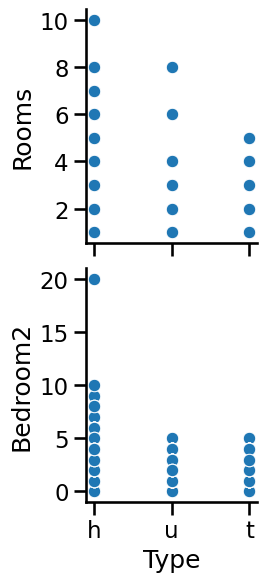

In [30]:
sns.pairplot(data=df_melb, y_vars=['Rooms', 'Bedroom2'], x_vars=['Type'], aspect=1, height=3)

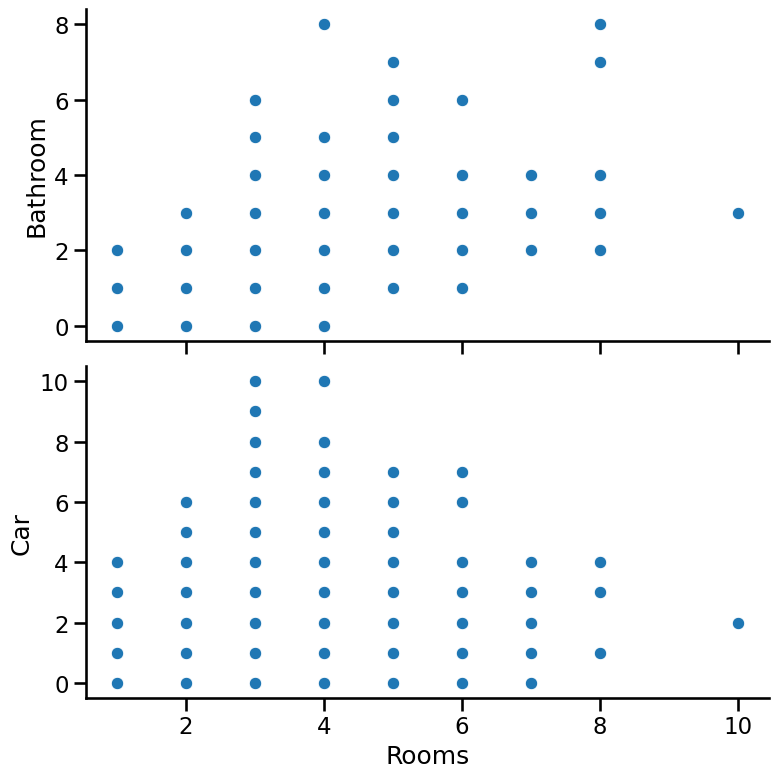

In [31]:
sns.pairplot(data=df_melb, y_vars=['Bathroom', 'Car'], x_vars=['Rooms'], aspect=2, height=4)

Se seleccionan las columnas de interes para predecir el precio de las propiedades

In [32]:
columns_prediction = ['Type', 'Rooms', 'Bedroom2', 'Car', 'Postcode', 'Address', 'Suburb', 'CouncilArea', 'Regionname']

In [33]:
df_melb_f = df_melb[columns_prediction].copy()

In [34]:
df_melb_f.head(5)

,Type,Rooms,Bedroom2,Car,Postcode,Address,Suburb,CouncilArea,Regionname
0,h,2,2.00,1.00,3067.00,85 Turner St,Abbotsford,Yarra,Northern Metropolitan
1,h,2,2.00,0.00,3067.00,25 Bloomburg St,Abbotsford,Yarra,Northern Metropolitan
2,h,3,3.00,0.00,3067.00,5 Charles St,Abbotsford,Yarra,Northern Metropolitan
3,h,3,3.00,1.00,3067.00,40 Federation La,Abbotsford,Yarra,Northern Metropolitan
4,h,4,3.00,2.00,3067.00,55a Park St,Abbotsford,Yarra,Northern Metropolitan


Se llevan a variables del tipo ```int``` las columnas con valores discretos



In [35]:
df_melb_f['Bedroom2'] = df_melb_f.Bedroom2.fillna(0).astype('int')
df_melb_f['Car'] = df_melb_f.Car.fillna(0).astype('int')
df_melb_f['Postcode'] = df_melb_f.Postcode.fillna(0).astype('int')

In [36]:
df_melb_f.head(5)

,Type,Rooms,Bedroom2,Car,Postcode,Address,Suburb,CouncilArea,Regionname
0,h,2,2,1,3067,85 Turner St,Abbotsford,Yarra,Northern Metropolitan
1,h,2,2,0,3067,25 Bloomburg St,Abbotsford,Yarra,Northern Metropolitan
2,h,3,3,0,3067,5 Charles St,Abbotsford,Yarra,Northern Metropolitan
3,h,3,3,1,3067,40 Federation La,Abbotsford,Yarra,Northern Metropolitan
4,h,4,3,2,3067,55a Park St,Abbotsford,Yarra,Northern Metropolitan


### 2.2 Combinacion de los _Dataset_

#### 2.2.1 Columnas de interes

Se vuelve a cargar el _Dataset_ con los datos de los Airbnb ya que el primero habia sido filtrado para trabajar más comodo y ahora necesitamos conocer todas las columnas y elegir algunas otras

In [37]:
df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv')

<ipython-input-37-8a8721369c40>:1: DtypeWarning: Columns (35,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv')


In [38]:
df_airbnb_f.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [39]:
interesting_cols = ['street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode', 'price', 'weekly_price', 'monthly_price']

Se agregan las siguientes columnas

In [40]:
interesting_cols.append('bathrooms')
interesting_cols.append('bedrooms')

In [41]:
interesting_cols

['street',
 'neighborhood',
 'city',
 'suburb',
 'state',
 'zipcode',
 'price',
 'weekly_price',
 'monthly_price',
 'bathrooms',
 'bedrooms']

In [42]:
df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)

<ipython-input-42-3960e141b9c5>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb_f = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cleansed_listings_dec18.csv', usecols=interesting_cols)


In [43]:
df_airbnb_f.columns

Index(['street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'bathrooms', 'bedrooms', 'price', 'weekly_price', 'monthly_price'],
      dtype='object')

In [44]:
df_airbnb_f.zipcode.head(5)

0    3105
1    3057
2    3182
3    3071
4    3183
Name: zipcode, dtype: object

In [45]:
df_airbnb_f['zipcode'] = pd.to_numeric(df_airbnb_f.zipcode, errors='coerce') #If 'coerce', then invalid parsing will be set as NaN.

In [46]:
df_airbnb_f['zipcode'] = df_airbnb_f.zipcode.fillna(0).astype('int')

In [47]:
df_airbnb_f['zipcode']

0        3105
1        3057
2        3182
3        3071
4        3183
         ... 
22890    3053
22891    3338
22892    3150
22893    3006
22894    3053
Name: zipcode, Length: 22895, dtype: int64

In [48]:
df_airbnb_f.zipcode.value_counts()

zipcode
3000     3367
3006     1268
3182     1135
3141      881
3004      728
         ... 
3785        1
3096        1
30122       1
3912        1
4068        1
Name: count, Length: 248, dtype: int64

Antes de unir los conjuntos de datos, tenemos que asegurarnos de que tengamos suficientes registros en común como para agregar información relevantes

In [49]:
intersection = np.intersect1d(
    df_airbnb_f.zipcode.values, df_melb_f.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes:", len(df_airbnb_f.zipcode.unique()))
print("Sales unique zipcodes:", len(df_melb_f.Postcode.unique()))
print("Common zipcodes:", len(intersection))

Airbnb unique zipcodes: 248
Sales unique zipcodes: 198
Common zipcodes: 191


In [50]:
print('Records in Sales df with corresponding zipcode form Airbnb df:',
      df_melb_f.Postcode.isin(intersection).sum() / len(df_melb_f))
print('Records in Airbnb df with corresponding zipcode form Sales df:',
      df_airbnb_f.zipcode.isin(intersection).sum() / len(df_airbnb_f))

Records in Sales df with corresponding zipcode form Airbnb df: 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df: 0.9302904564315353


#### 2.2.2 Union por zipcode

In [51]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [52]:
df_airbnb_f[relevant_cols + ['zipcode']].groupby('zipcode').mean().reset_index()[:5]

,zipcode,price,weekly_price,monthly_price
0,0,159.63,906.08,3179.67
1,2010,40.00,NaN,NaN
2,2134,50.00,NaN,NaN
3,2582,104.00,NaN,NaN
4,3000,150.50,918.74,3407.20


In [53]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = df_airbnb_f[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()

In [54]:
airbnb_price_by_zipcode

zipcode  price       weekly_price monthly_price
              mean count         mean          mean
0         0 159.63   146       906.08       3179.67
1      2010  40.00     1          NaN           NaN
2      2134  50.00     1          NaN           NaN
3      2582 104.00     1          NaN           NaN
4      3000 150.50  3367       918.74       3407.20
..      ...    ...   ...          ...           ...
243    7367 230.00     1          NaN           NaN
244    8938 296.00     1          NaN           NaN
245    9004 226.00     1          NaN           NaN
246    9540 245.00     1          NaN           NaN
247   30122  75.00     1       525.00       2281.00

[248 rows x 5 columns]

In [55]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = df_airbnb_f[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

## Option 2
# Pass as argument name the new name of the column, and as value a tuple where
# the first value is the original column and the second value is the operation.
# airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
#   .agg(airbnb_record_count=('price', 'count'),
#        airbnb_price_mean=('price', 'mean'),
#        airbnb_weekly_price_mean=('weekly_price', 'mean'),
#        airbnb_monthly_price_mean=('monthly_price', 'mean'))\
#   .reset_index()

airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,159.63,146,906.08,3179.67
1,2010,40.00,1,NaN,NaN
2,2134,50.00,1,NaN,NaN


In [56]:
merged_sales_df = df_melb_f.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df.sample(5)

,Type,Rooms,Bedroom2,Car,Postcode,Address,Suburb,CouncilArea,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
4828,h,2,2,1,3181,14 Aberdeen Rd,Prahran,Stonnington,Southern Metropolitan,3181.00,148.17,460.00,868.15,3304.38
13538,h,4,4,2,3191,221 Bluff Rd,Sandringham,NaN,Southern Metropolitan,3191.00,195.72,50.00,1118.70,4375.86
6950,h,2,2,2,3123,742 Burwood Rd,Hawthorn East,Boroondara,Southern Metropolitan,3123.00,151.30,81.00,1340.67,6069.00
832,h,4,4,2,3165,87 Parkmore Rd,Bentleigh East,Glen Eira,Southern Metropolitan,3165.00,113.04,51.00,563.20,2032.80
307,h,2,2,1,3032,2 The Parade,Ascot Vale,Moonee Valley,Western Metropolitan,3032.00,111.61,176.00,469.87,1677.92


In [57]:
merged_sales_df.columns, merged_sales_df.shape

(Index(['Type', 'Rooms', 'Bedroom2', 'Car', 'Postcode', 'Address', 'Suburb',
        'CouncilArea', 'Regionname', 'zipcode', 'airbnb_price_mean',
        'airbnb_record_count', 'airbnb_weekly_price_mean',
        'airbnb_monthly_price_mean'],
       dtype='object'),
 (13580, 14))

#### 2.2.3 Otras variables para combinar los datos

Las dos variables que pueden ser utiles para combinar los datos son: **Latitud** y **Longitud**

In [58]:
pd.options.display.float_format = '{:.6f}'.format

In [59]:
df_melb[['Lattitude', 'Longtitude']]

,Lattitude,Longtitude
0,-37.799600,144.998400
1,-37.807900,144.993400
2,-37.809300,144.994400
3,-37.796900,144.996900
4,-37.807200,144.994100
...,...,...
13575,-37.905620,145.167610
13576,-37.859270,144.879040
13577,-37.852740,144.887380
13578,-37.859080,144.892990


In [60]:
df_airbnb[['latitude', 'longitude']]

,latitude,longitude
0,-37.772684,145.092133
1,-37.766505,144.980736
2,-37.859755,144.977369
3,-37.758971,144.989228
4,-37.864530,144.992238
...,...,...
22890,-37.802415,144.962967
22891,-37.705095,144.574474
22892,-37.875252,145.162757
22893,-37.827795,144.954987


In [61]:
print('Lat.\tMedia df_melb:\t\t', df_melb.Lattitude.mean())
print('Lat.\tMedia df_airbnb:\t', df_airbnb.latitude.mean())
print('Long.\tMedia df_melb:\t\t', df_melb.Longtitude.mean())
print('Long.\tMedia df_airbnb:\t', df_airbnb.longitude.mean())

Lat.	Media df_melb:		 -37.80920273343152
Lat.	Media df_airbnb:	 -37.826827302354666
Long.	Media df_melb:		 144.99521618777615
Long.	Media df_airbnb:	 145.00845712462984


In [62]:
print('Desv. std. df_melb:\t', df_melb.Lattitude.std())
print('Desv. std. df_airbnb:\t', df_airbnb.latitude.std())
print('Desv. std. df_melb:\t', df_melb.Longtitude.std())
print('Desv. std. df_airbnb:\t', df_airbnb.longitude.std())

Desv. std. df_melb:	 0.07925982260355399
Desv. std. df_airbnb:	 0.0667471415268449
Desv. std. df_melb:	 0.10391556140737544
Desv. std. df_airbnb:	 0.1277106244242135


Se observa que presentan valores muy miliares entre si, con la diferencia de algunos decimales. Para poder unir ambos _Dataset_ se deberia:

- Investigar como se mide Latitud y Longitud
- Tomar un criterio para redondear los valores


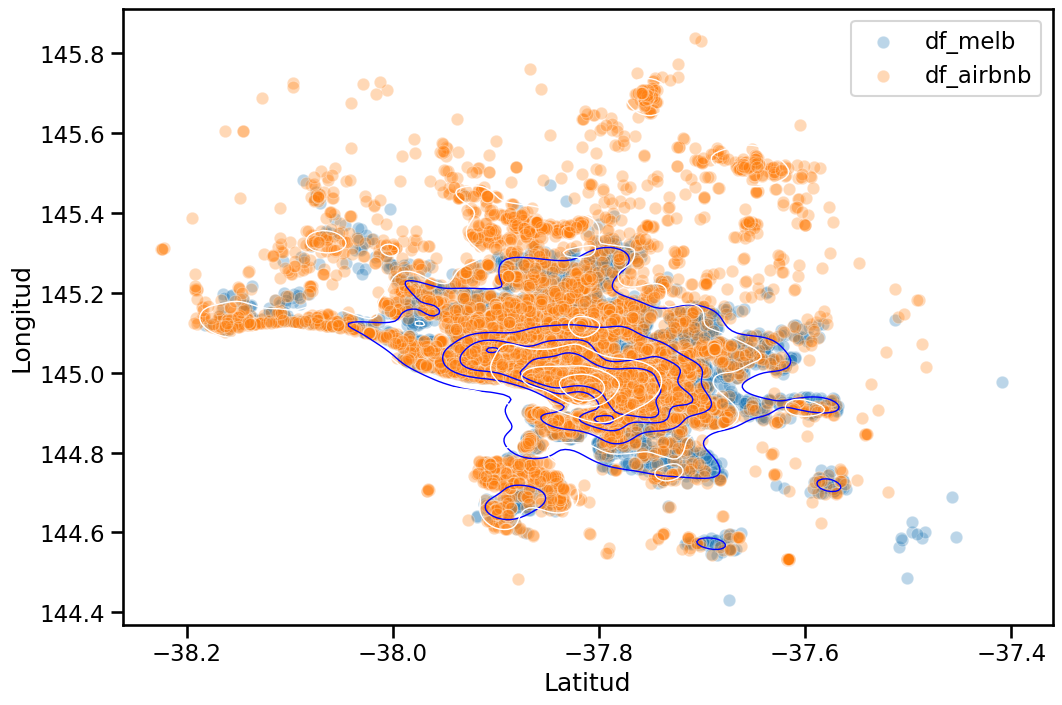

In [63]:
#sns.set_theme(style="dark")



plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_melb, x='Lattitude', y='Longtitude', label='df_melb', alpha=0.3)
sns.scatterplot(data=df_airbnb, x='latitude', y='longitude', label='df_airbnb', alpha=0.3)
sns.kdeplot(data=df_melb, x='Lattitude', y='Longtitude', levels=5, color="b", linewidths=1)
sns.kdeplot(data=df_airbnb, x='latitude', y='longitude', levels=5, color="w", linewidths=1)


plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()
plt.show()

El grafico muestra una gran similud en la distribucion de valores para ambas variables de los dos _Dataset_

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [64]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)
from google.colab import files
files.download('melb_data_extended.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)